In [1]:
from explore import *

In [2]:
#here we read in the dataframe which was saved previously as a pickle

datadf=pd.read_pickle('cleanpickle.pkl')

In [3]:
## Here the set gynaastics are simply to show the numbers of unique wrods realating to each language. 
# We also create a set of all the words. This was was mostly just verifcation for a the venn word cloud since I have no prior experience with it.
# We also needed to do some formatting gymnastics to satisfy the venn wordcloud. Specifically we created a dictionary with the keys being the words and the values being the
# value counts which end up being a frequency dictionary.

df_C=datadf[datadf['language']=='C']
df_Py=datadf[datadf['language']=='Python']
df_Java=datadf[datadf['language']=='Java']

# Seperating to find independent word sets
importantcols=['language', 'repo', 'stemmed']
#Next we isolate the impoortant cols

df_C=df_C[importantcols]
df_Py=df_Py[importantcols]
df_Java=df_Java[importantcols]



c_wordset=wordset(df_C)
py_wordset=wordset(df_Py)
java_wordset=wordset(df_Java)

wordsetslist=[c_wordset,py_wordset,java_wordset]


setints=set()
setints=c_wordset.intersection(*wordsetslist)



unionset=set()
unionset=unionset.union(*wordsetslist)



disjointfromaggunion=unionset-setints;disjointfromaggunion




## This part is worth noting as it shows the unique words in each language
unique_C=c_wordset-(py_wordset.union(java_wordset));unique_C
unique_Py=py_wordset-(c_wordset.union(java_wordset));unique_Py
unique_Java=java_wordset-(c_wordset.union(py_wordset));unique_Java




#This here we turn the value counts as dataframe
combined=combinedwordlist(df_C,df_Py,df_Java)





#Makes a dataframe with the words as an index, all, c,py,java as cols
word_counts_df=combinedwordcountdf(df_C,df_Py,df_Java)






#gymnastics to add IDF, TF and TF/IDF
collist=word_counts_df.columns.to_list()

popped=collist.pop(collist.index('all'))
popped

a=word_counts_df[['c','py','java']].applymap(lambda x:1 if x > 0 else x)
b=a.sum(axis=1)
word_counts_df['idf']=3/b
for i in collist:
    word_counts_df[f'{i}_TF']=word_counts_df[i]/word_counts_df[popped]
    word_counts_df[f'{i}_TF/IDF']=word_counts_df[f'{i}_TF']/word_counts_df['idf']


collist=word_counts_df.columns.to_list()
popper=collist.pop(collist.index('idf'))
collist.sort()
collist.insert(1,popper)


word_counts_df=word_counts_df[collist]





#Made a dictionary of the value counts this is used to feed funtions a frequency
#The remainder of this code is just formating in order to be read by the visualizations functions
aggvaldic=pd.Series(combined).value_counts()

combinedvalcount=dict(zip(aggvaldic.index.to_list(),list(aggvaldic.values)))
intersectiondic={}
for i in setints:
    a=combinedvalcount.get(i)
    intersectiondic.update({i:a})

intersectiondic
intersectionfreqlist=[]
for i in list(intersectiondic.keys()):
    n=int(intersectiondic.get(i))
    for r in range(0,n):
        intersectionfreqlist.append(i)
len(intersectionfreqlist)


intersectionfreqlist=' '.join(intersectionfreqlist)



anytwouniondic={}
for i in disjointfromaggunion:
    a=combinedvalcount.get(i)
    anytwouniondic.update({i:a})

anytwouniondic
anytwounion=[]
for i in list(anytwouniondic.keys()):
    n=int(anytwouniondic.get(i))
    for r in range(0,n):
        anytwounion.append(i)
len(anytwounion)


anytwofreqlist=' '.join(anytwounion)

combined=' '.join(combined)










### The next cell is for reproducability only. Uncomment then run again.

In [4]:
## Uncomment below for your first run to create the filter this was then recursively applied to our prepare section. You need to run this once if you are going to reproduce this.

# total=list(set(combined))
# total.sort()
# total

# total=list(filter(lambda x : x in  words.words(),total))
# total=pd.to_pickle(pd.Series(total),'words.pkl')

# total=pd.read_pickle('words.pkl')






# Explore 
### Hypothesis: The sets of words corresponding to C, Python and Java will have independent values.

### Results of set manipulation and valuecounts based on language
>   #### We see that only C has unique values, but we see some other interesting results as we have created both sets and frequencies.

In [1]:
## We observe the top 3 most frequent words per language

ctop=word_counts_df['c'].sort_values(ascending=False)
pytop=word_counts_df['py'].sort_values(ascending=False)
javatop=word_counts_df['java'].sort_values(ascending=False)


## We  combine that with information for the sets we created above to give and indea of independence, interesections and unions of values in additon to the values frequency

print(f'The total number of unique "words" for each language is as follows:\n\nPython:\n{len(unique_Py)}\n\nC:\n{len(unique_C)}\n\nJava:\n{len(unique_Java)}')
print()
print(f'The total number of unique "words" in the union of every language is as follows:\n{len(unionset)}')
print()
print(f'The total number of unique "words" in the intersection of every language is as follows:\n{len(setints)}')
print()


print(f'This is the top three most frequent words from C, Python and Java respectively:\n\n{ctop[:3]}\n\n{pytop[:3]}\n\n{javatop[:3]}\n\n')

NameError: name 'word_counts_df' is not defined

# Visualizations
>We create a frequency graph to see the 20 most frequent words overall and their proportion respective to each language

>The final visual is the most informative it is a venn diagram and wordcloud combination. 

>It is an accurate represation of the values and how they are shared by each respective language.

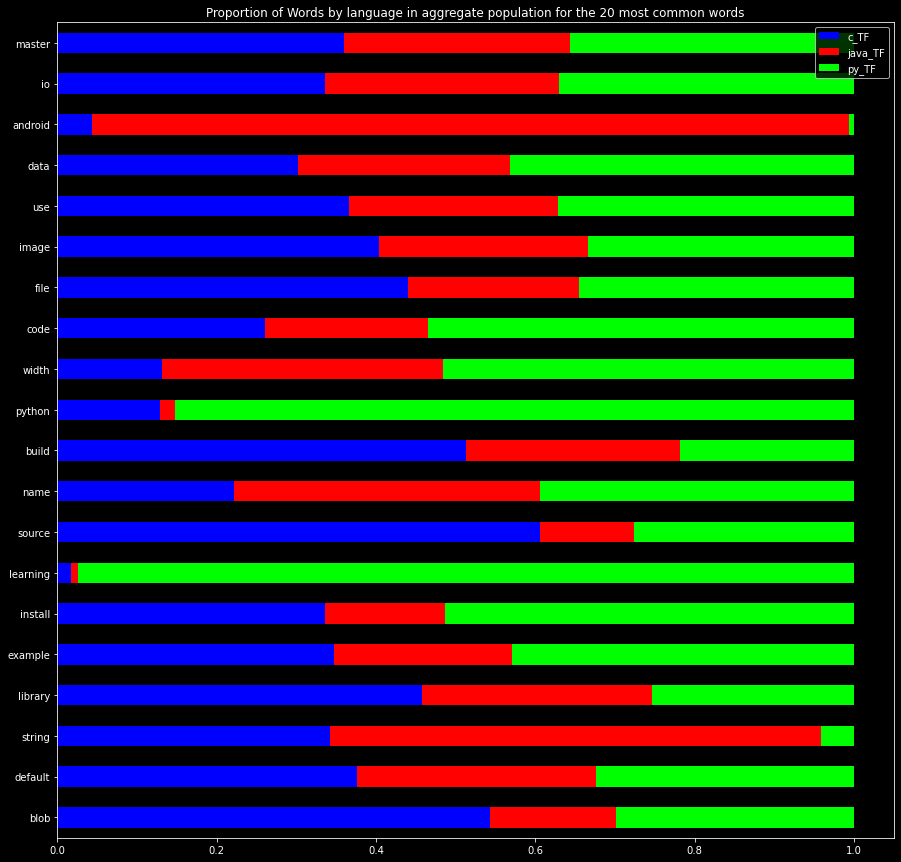

In [6]:

#This is just visual to understand the proportions of each word's frequency respective to each language for the top 20 most common words in aggregate population


(word_counts_df.sort_values(by='all'))[['c_TF','java_TF','py_TF']].tail(20).plot.barh(stacked=True,figsize=(15,15),colormap='brg')

plt.title('Proportion of Words by language in aggregate population for the 20 most common words');



In [7]:
##This is all commented out because the venn wordcload conveys the same information with added detail and additional clarity
## They were left for verification only



# img = WordCloud(background_color='black',collocations=False).generate(combined)
# # WordCloud() produces an image object, which can be displayed with plt.imshow
# plt.imshow(img)
# # axis aren't very useful for a word cloud
# plt.axis('off')
# plt.title('Word Cloud for union of the entire population');





# img = WordCloud(background_color='black',collocations=False).generate(intersectionfreqlist)
# # WordCloud() produces an image object, which can be displayed with plt.imshow
# plt.imshow(img)
# # axis aren't very useful for a word cloud
# plt.axis('off')
# plt.title('Word Cloud for intersection of the entire population');



# img = WordCloud(background_color='black',collocations=False).generate(anytwofreqlist)
# # WordCloud() produces an image object, which can be displayed with plt.imshow
# plt.imshow(img)
# # axis aren't very useful for a word cloud
# plt.axis('off')
# plt.title('Union minus Intersection');



# wordclouds(df_C,df_Py,df_Java)

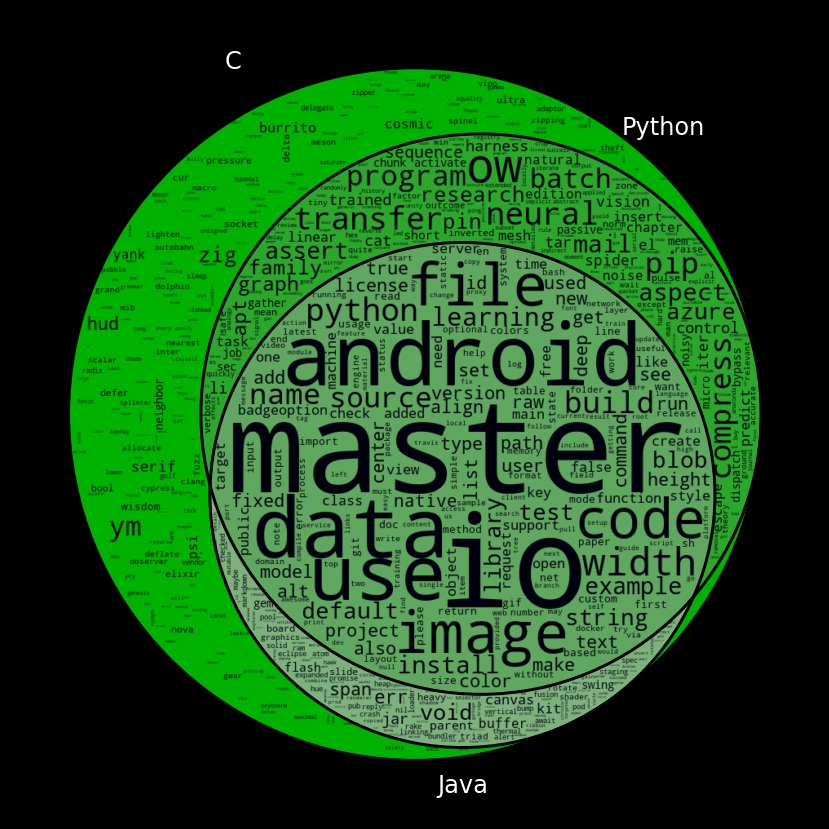

In [8]:
## The commented out is different aestetic variations of the same. We create a venn diagram that represents the C,Python and Java words from the readmes.

fig,axs=plt.subplots(1,1,figsize=(60,15))
a=axs
# b=axs[1]
# c=axs[2]
# d=axs[3]
# e=axs[4]
# v = venn3(subsets=[ c_wordset,py_wordset, java_wordset], set_labels = ('C','Python', 'Java'), set_colors=['k', '.35', 'w'],ax=b,alpha=.7)
# plot = venn3_circles([ c_wordset,py_wordset, java_wordset],color='red',ax=b)
# venn3_wordcloud(wordsetslist,word_to_frequency=combinedvalcount,set_labels=[ "C",'Python', 'Java'], set_colors=['0', '0', '0'],  set_edgecolors=['0', 'lime', 'lime'],alpha=.7,ax=a,wordcloud_kwargs={"colormap":'inferno', 'max_words':2000,'max_font_size':200,'collocations':False})
# venn3_wordcloud(wordsetslist,word_to_frequency=combinedvalcount,set_labels=[ "C",'Python', 'Java'], set_colors=['lime','lime', 'lime'],  set_edgecolors=['0', '0', '0'],alpha=.7,ax=b)
# venn3_wordcloud(wordsetslist,word_to_frequency=combinedvalcount,set_labels=[ "C",'Python', 'Java'], set_colors=['k', '.35', 'w'],  set_edgecolors=['0', '0', '0'],alpha=.7,ax=c,wordcloud_kwargs={"colormap":'inferno', 'max_words':2000,'max_font_size':200,'collocations':False})
# venn3_wordcloud(wordsetslist,word_to_frequency=combinedvalcount,set_labels=[ "C",'Python', 'Java'], set_colors=['lime','lime', 'lime'],  set_edgecolors=['0', '0', '0'],alpha=.7,ax=d,wordcloud_kwargs={"colormap":'gray'})
venn3_wordcloud(wordsetslist,word_to_frequency=combinedvalcount,set_labels=[ "C",'Python', 'Java'], set_colors=['lime','.35', 'w'],  set_edgecolors=['0', '0', '0'],alpha=.7,ax=a)


plt.show()
# colormap='RdYlGn'